# EDA for Chatbot Astrax

# Import Library

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

try:
    from wordcloud import WordCloud
except:
    %pip install wordcloud
finally:
    from wordcloud import WordCloud

# Load Data

In [58]:
df = pd.read_csv("../data/faq_categorization.csv")
df.head()

,Question,Answer,Topik
0,Penggunaan NPWP 16 Digit pada Aplikasi SAKTI d...,Soal sering ditanya terkait Penggunaan NPWP 16...,Layanan Digital DJP
1,PMK-66 Tahun 2023 Terkait Natura,Link PDF: https://pajak.go.id/system/files/202...,Regulasi
2,PMK-72 Tahun 2023 Terkait Amortisasi,Link PDF: https://pajak.go.id/system/files/202...,Regulasi
3,Panduan Pemadanan NPWP Secara Langsung,Layanan pemadanan Nomor Pokok Wajib Pajak (NPW...,Terkait NPWP
4,Penyampaian SPT Masa PPh Final dalam Rangka PPS,Link PDF: https://pajak.go.id/system/files/202...,Regulasi


# Analysis

## 1. Dataset Overview

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  209 non-null    object
 1   Answer    209 non-null    object
 2   Topik     209 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


In [60]:
df.head(15)

,Question,Answer,Topik
0,Penggunaan NPWP 16 Digit pada Aplikasi SAKTI d...,Soal sering ditanya terkait Penggunaan NPWP 16...,Layanan Digital DJP
1,PMK-66 Tahun 2023 Terkait Natura,Link PDF: https://pajak.go.id/system/files/202...,Regulasi
2,PMK-72 Tahun 2023 Terkait Amortisasi,Link PDF: https://pajak.go.id/system/files/202...,Regulasi
3,Panduan Pemadanan NPWP Secara Langsung,Layanan pemadanan Nomor Pokok Wajib Pajak (NPW...,Terkait NPWP
4,Penyampaian SPT Masa PPh Final dalam Rangka PPS,Link PDF: https://pajak.go.id/system/files/202...,Regulasi
5,Sistem Terdampak ILAP NPWP 16 Digit,Link PDF: https://pajak.go.id/system/files/202...,Terkait NPWP
6,Penataan Ulang Organisasi Instansi Vertikal Di...,"Informasi tentang ""Penataan Ulang Organisasi I...",Pertanyaan Umum Pajak
7,Penghentian Penyidikan Pasal 44B,"Informasi tentang ""Penghentian Penyidikan Pasa...",Penyidikan & Pemeriksaan
8,Penanganan Kode Error E-Form,"Informasi tentang ""Penanganan Kode Error E-For...",Kode Error
9,Penanganan Kode Error e-Filing,"Informasi tentang ""Penanganan Kode Error e-Fil...",SPT Tahunan


In [61]:
df.tail(15)

,Question,Answer,Topik
194,Bagaimana cara mengisi Induk SPT pada e-Form?,"Pada Induk SPT, yang harus diisi sebagai berik...",SPT Tahunan
195,Bagaimana cara melaporkan SPT e-Form yang suda...,Cara mengirimkan SPT e-Form yang sudah diisi l...,SPT Tahunan
196,Hal-hal apa saja yang wajib diketahui apabila ...,Dalam layanan e-Form terdapat hal-hal yang waj...,SPT Tahunan
197,Bagaimana tata cara pelaporan SPT Tahunan deng...,Pelaporan SPT Tahunan dengan menggunakan e-fil...,SPT Tahunan
198,Apa saja syarat-syarat penyampaian SPT Tahunan...,Sesuai Pasal 6 ayat (2) Peraturan Direktur Jen...,SPT Tahunan
199,SPT Tahunan yang disampaikan oleh Wajib Pajak ...,Meskipun Wajib Pajak telah menyampaikan SPT Ta...,SPT Tahunan
200,Apakah Wajib Pajak dapat melakukan penundaan a...,Pada prinsipnya sesuai dengan Pasal 3 ayat (3)...,SPT Tahunan
201,Bagaimana cara memberitahukan perpanjangan pen...,Tatacara pemberitahuan perpanjangan penyampaia...,SPT Tahunan
202,Sampai kapan batas akhir Penyampaian SPT Tahun...,Perpanjangan jangka waktu penyampaian SPT Tahu...,SPT Tahunan
203,Apa yang dilakukan oleh DJP apabila pemberitah...,Apabila Pemberitahuan Perpanjangan SPT Tahunan...,Pertanyaan Umum Pajak


### Rows with non-standard Answers

In [62]:
# Answer is "Tidak ada jawaban."
non_standard_mv = ["Tidak ada jawaban."]

no_answer_rows = df[df['Answer'].str.strip() == "Tidak ada jawaban."]
no_answer_rows[['Question', 'Answer']]

,Question,Answer
148,FAQ e-SPT Masa PPh Pasal 21-26 (PER-32/PJ/2009),Tidak ada jawaban.


In [63]:
# Answer contains "Jawaban untuk....."

non_standard_mv = ["Jawaban untuk "]
redirected_answer_rows = df[df['Answer'].str.contains('|'.join(non_standard_mv), case=False, na=False)]

redirected_answer_rows[['Question', 'Answer']]
print(f'\nThere are a total of {len(redirected_answer_rows)} QUESTIONS where the Answer contains "Jawaban untuk.....": \n')
for index, row in redirected_answer_rows.iterrows():
    print(f"Answer of Q#{index}: {row['Answer']}\n")


There are a total of 10 QUESTIONS where the Answer contains "Jawaban untuk.....": 

Answer of Q#11: Jawaban untuk "Panduan Penggunaan Aplikasi e-objection" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/panduan-penggunaan-aplikasi-e-objection

Answer of Q#121: Jawaban untuk "Bagaimana pembuatan e-Faktur oleh Cabang yang telah dilakukan Pemusatan tempat terutang PPN?" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/22-bagaimana-pembuatan-e-faktur-oleh-cabang-yang-telah-dilakukan-pemusatan-tempat-terutang-ppn

Answer of Q#133: Jawaban untuk "Apa persyaratan dan ketentuan yang berlaku untuk meminta Sertifikat Elektronik?" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/10-apa-persyaratan-dan-ketentuan-yang-berlaku-untuk-meminta-sertifikat-elektronik

Answer of Q#137: Jawaban untuk "Dimana dan bagaimana cara memperoleh aplika

***SUMMARY***:

- The dataset contains **209 Q&A pairs**, with both `Question` and `Answer` fields are non-null and text-based, making them suitable for use in training RAG model.
- Initial inspection shows a mix of answer formats, including text descriptions and links to official documents or PDFs from pajak.go.id.

- One question has ***No Answer***. We might consider removing this due to the nature that chatbot won't be able to answer this and treat it as out-of-context question.
- Some of the answers are duplicating the question with prefix "Jawaban untuk {question} terlalu panjang untuk ditampilkan" before stating the answer. This might be unneccessary and create a non-friendly chatbot response for the users. Some further cleaning might be neccessary to provide a more friendly responses.

## 2. Basic Text Statistics

### Distribution of Question and Answer Lengths

In [64]:
df['question_len'] = df['Question'].apply(len)
df['answer_len'] = df['Answer'].apply(len)

q_stats = df['question_len'].describe().to_frame().rename(columns={'question_len': 'Question Length'})
a_stats = df['answer_len'].describe().to_frame().rename(columns={'answer_len': 'Answer Length'})

combined_stats = pd.concat([q_stats, a_stats], axis=1)
combined_stats

,Question Length,Answer Length
count,209.000000,209.000000
mean,78.837321,415.521531
std,48.549958,410.949453
min,13.000000,18.000000
25%,46.000000,193.000000
50%,65.000000,292.000000
75%,101.000000,490.000000
max,248.000000,3529.000000


Questions tend to be concise, while answers range more broadly due to either short summaries or longer procedural instructions.

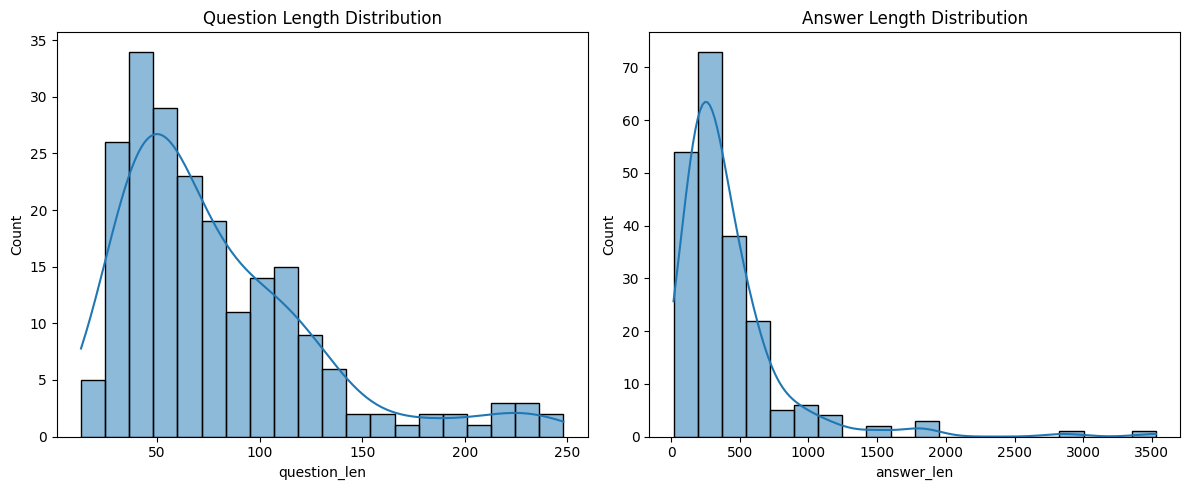

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['question_len'], bins=20, ax=axs[0], kde=True)
axs[0].set_title("Question Length Distribution")
sns.histplot(df['answer_len'], bins=20, ax=axs[1], kde=True)
axs[1].set_title("Answer Length Distribution")
plt.tight_layout()
plt.show()

***SUMMARY***:

Most questions are relatively short and focused, while answers are relatively longer and show more variability in length. This reflects real-life FAQ structure, where questions are concise and answers can be detailed or link-based.

The majority of questions fall below 150 characters (with majority being in the 50-60 chars). While majority of answers fall within the 100-200 characters length, showing a longer tail distribution, with some answers as long as 3.5k characters, possible an instruction-based answer

We can consider truncation or summarization strategies for very long answers when generating responses.

However, some of the questions might be too short and represents more a title of an intent/topic rather than a full questions. Let's see some example of questions with less than 30 characters

### Short questions with less than 30 characters

In [66]:
short_questions = df[df['question_len'] < 30]
print(f'Total = {len(short_questions)} questions')
short_questions[['Question', 'question_len']]

Total = 12 questions


,Question,question_len
8,Penanganan Kode Error E-Form,28
13,Laporan Pasca Amnesti Pajak,27
14,Pemeriksaan Bukti Permulaan,27
19,Batasan File Upload SPT,23
20,Amnesti Pajak,13
85,Input retur sebelum e-Faktur?,29
143,FAQ e-SPT Masa PPN 1107PUT,26
144,FAQ e-SPT Masa PPN 1111,23
147,FAQ e-SPT Masa PPh Pasal 22,27
150,FAQ e-SPT Masa PPh Pasal 15,27


These are example of 11 short questions that represents more of a broader FAQ topics instead of a question format. We might need to explore or augment further these types of questions

### Long answers questions with more than 1,000 characters

In [67]:
long_answers = df[df['answer_len'] > 1000]
print(f"Total long answers more than 1000 chars = {len(long_answers)} questions\n")
print("########################### Examples:")

# show only 3 examples
for i, (index, row) in enumerate(long_answers.iterrows()):
    print(f"Q: {row['Question']}\nA: {row['Answer']}\n")
    if i == 2:
        break

Total long answers more than 1000 chars = 12 questions

########################### Examples:
Q: Ada berapa jenis formulir SPT Tahunan bagi Wajib Pajak Orang Pribadi?
A: Ada 3 jenis formulir SPT Tahunan untuk pelaporan Wajib Pajak Orang Pribadi, yaitu:
a. Formulir 1770 SS
Formulir ini memiliki struktur dan bentuk yang paling sederhana karena hanya 1 lembar.
Formulir ini digunakan oleh Wajib Pajak yang mempunyai penghasilan selain dari usaha
dan/atau pekerjaan bebas dengan penghasilan bruto tidak lebih dari Rp60.000.000,00 dalam
satu tahun
Formulir 1770 SS:
Di akhir tahun karyawan harus meminta bukti potong 1721-A1 untuk karyawan swasta
dan bukti potong 1721-A2 untuk pegawai negri sehingga memudahkan untuk mengisi
formulir 1770 SS dikarenakan di dalam bukti potong 1721-A1 maupun 1721-A2 sudah
tertera penghasilan bruto karyawan tersebut selama 1 tahun.
Dalam pengisiannya formulir ini merupakan yang paling sederhana dikarenakan hanya
memindahkan data yang sudah ada dalam bukti potong 1721

We can see that even if those answers might seem long, they're still in-context of answering the respective questions.

C:\Users\galuh\AppData\Local\Temp\ipykernel_13488\3859774624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_answers['length_bin'] = pd.cut(long_answers['answer_len'], bins)


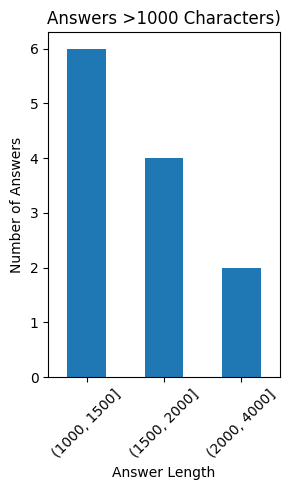

In [68]:
bins = [1000, 1500, 2000, 4000]
long_answers['length_bin'] = pd.cut(long_answers['answer_len'], bins)
bin_counts = long_answers['length_bin'].value_counts().sort_index()

plt.figure(figsize=(3, 5))
bin_counts.plot(kind='bar')
plt.xlabel("Answer Length")
plt.ylabel("Number of Answers")
plt.title("Answers >1000 Characters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Duplicate Detection

In [69]:
duplicate_questions = df[df.duplicated('Question')]
duplicate_answers = df[df.duplicated('Answer')]

print(f"Duplicate questions: {len(duplicate_questions)}")
print(f"Duplicate answers: {len(duplicate_answers)}")

Duplicate questions: 0
Duplicate answers: 3


No duplicate questions exist, and only 1 duplicate answers, which would be considered normal for FAQ-based document. 
This indicates that the the dataset is diverse and clean—no major deduplication required.

Let's check in detail what question is this

In [70]:
duplicate_answers = df[df.duplicated('Answer', keep=False)]
duplicate_answers = duplicate_answers.sort_values('Answer')

print("Questions:")
print(duplicate_answers['Question'].unique())

print("\nDuplicated Answer:")
print(duplicate_answers['Answer'].unique())

Questions:
['Mengapa DJP Online tidak bisa diakses?'
 'Mengapa Kode Keamanan tidak muncul?'
 'Mengapa saya tidak menerima link aktivasi DJP Online ke email?'
 'Jika data e-Faktur hilang, apa yang harus dilakukan oleh PKP?'
 'Dalam keadaan tertentu, apakah PKP diperkenankan meminta database e-Faktur yang telah dibuat ke DJP?']

Duplicated Answer:
['DJP Online tidak bisa diakses kemungkinan disebabkan jumlah akses menuju DJP Online sangat\npadat, server down, jaringan bermasalah (tidak stabil), dan sebagainya, sehingga tidak semua\npengguna dapat mengakses DJP Online dengan lancar.'
 'Dalam hal Pengusaha Kena Pajak (PKP) mengalami kendala teknis yang menyebabkan data e-Faktur rusak atau hilang, PKP dapat mengajukan permintaan data e-Faktur terbatas pada data e-Faktur yang telah diunggah (upload) ke Direktorat Jenderal Pajak (DJP) melalui Kantor Pelayanan Pajak (KPP) tempat PKP dikukuhkan.']


## 4. Keyword Frequency

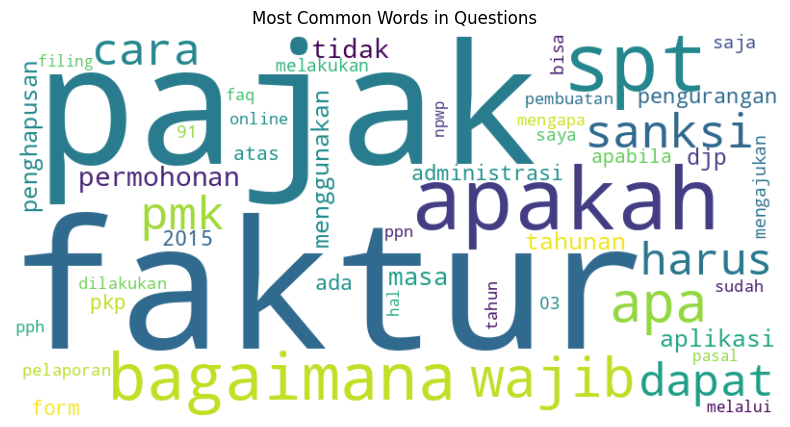

In [71]:
custom_stopwords = ['yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'adalah', 'oleh', 'atau', 'jika', 'karena', 'akan', 'ini', 'itu', 'sebagai', 'dalam']

vectorizer = CountVectorizer(stop_words=custom_stopwords, max_features=50)
X = vectorizer.fit_transform(df['Question'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Questions")
plt.show()

The most common words in the FAQ document includes "faktur", "pajak", "apakah", "wajib", "bagaimana". This shows coherence with the main theme which is questions around taxation.

These could be used for tagging or intent classification if needed.


## 5. Link Presence in Answers

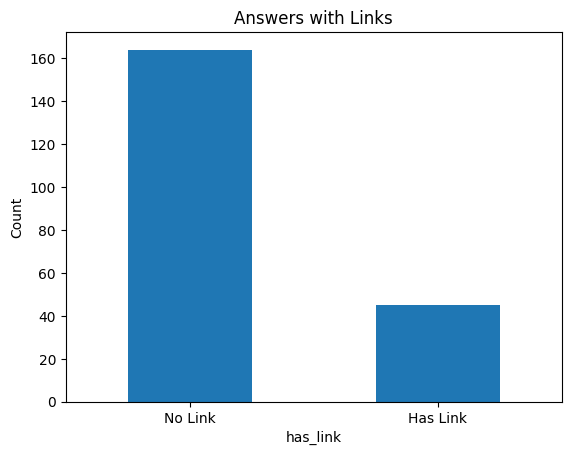

In [72]:
df['has_link'] = df['Answer'].apply(lambda x: bool(re.search(r'https?://', x)))
df['has_link'].value_counts().plot(kind='bar', title='Answers with Links')
plt.xticks(ticks=[0, 1], labels=['No Link', 'Has Link'], rotation=0)
plt.ylabel("Count")
plt.show()

Some number of answers contain links. These are mainly references to official documents. These links can be useful for chatbot to redirect users for a more complete answer.

## 6. Topic Distribution

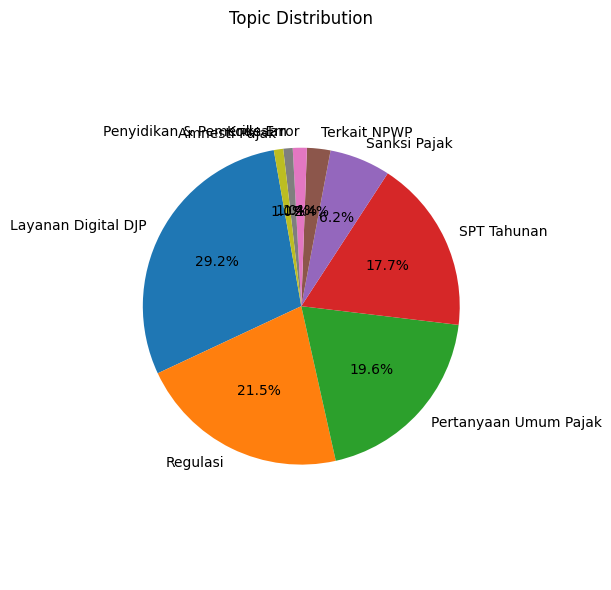

In [73]:
topic_counts = df['Topik'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    topic_counts.values,
    labels=topic_counts.index,
    autopct='%1.1f%%',
    startangle=100
)
plt.title("Topic Distribution")
plt.axis('equal')  # Ensures the pie chart is circular
plt.tight_layout()
plt.show()

## 7. Average Length per Topic

C:\Users\galuh\AppData\Local\Temp\ipykernel_13488\3008862355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=char_count_data.values, y=char_count_data.index, palette="viridis")


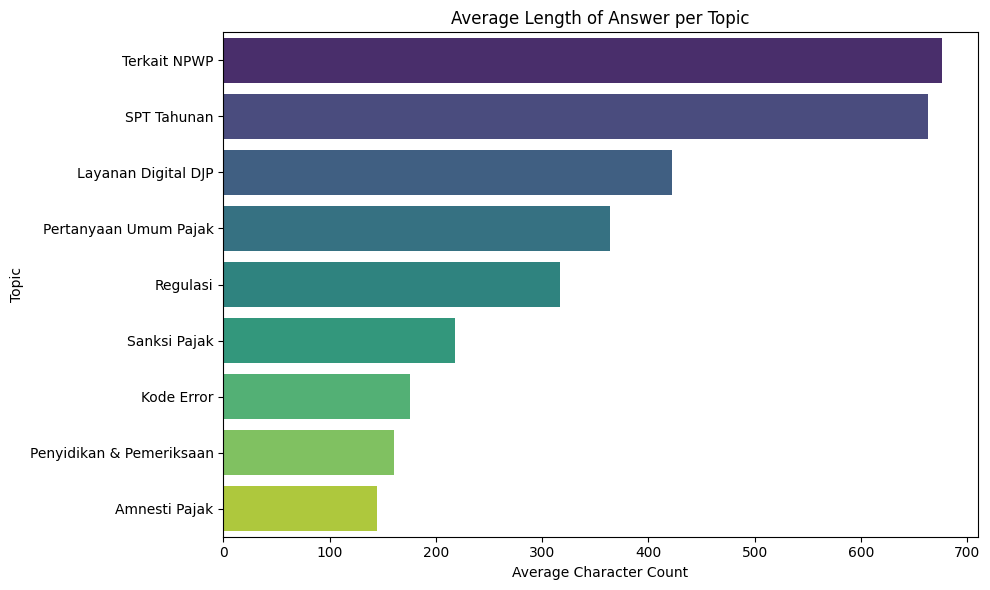

In [74]:
char_count_data = df.groupby('Topik')['answer_len'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=char_count_data.values, y=char_count_data.index, palette="viridis")
plt.title("Average Length of Answer per Topic")
plt.xlabel("Average Character Count")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

In [82]:
sampled_questions = df.groupby('Topik').apply(
    lambda x: x[['Topik', 'Question']].sample(n=min(len(x), 3), random_state=92)
).reset_index(drop=True)

display(sampled_questions)

C:\Users\galuh\AppData\Local\Temp\ipykernel_13488\3173374473.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_questions = df.groupby('Topik').apply(


,Topik,Question
0,Amnesti Pajak,Amnesti Pajak
1,Amnesti Pajak,Laporan Pasca Amnesti Pajak
2,Kode Error,Panduan Penanganan Kode Error Layanan Online
3,Kode Error,Penanganan Kode Error E-Form
4,Kode Error,"Mengapa ada pesan kesalahan (kode error) ""400""..."
5,Layanan Digital DJP,Apakah lampiran e-Faktur yang memuat detil pen...
6,Layanan Digital DJP,Bagaimana pengkreditan Pajak Masukan oleh PKP ...
7,Layanan Digital DJP,Dimana dan bagaimana cara memperoleh aplikasi ...
8,Penyidikan & Pemeriksaan,Pemeriksaan Bukti Permulaan
9,Penyidikan & Pemeriksaan,Penghentian Penyidikan Pasal 44B


## Recommendations

- **Preprocessing for LLM**: 
    - Normalize text (e.g., lowercasing, punctuation cleanup)
    - Consider shortening some of the answers, since their average word counts can be quite long. This ensures the chatbot responses remains concise. For longer answers, we can cite link or references.

- **Answer cleaning**:
    - One question have *"Tidak ada jawaban."* (no answer) as the answer. This can mislead the chatbot, and should probably be treated as out-of-context question.
    - Some of the answers are duplicating the question with prefix *"Jawaban untuk {question} terlalu panjang untuk ditampilkan"* before stating the answer. This might be unneccessary and create a non-friendly chatbot response for the users. Some further cleaning to the answers might be neccessary to provide a more friendly responses.
    - Most of the answers are written straight-to-the-point. We might want to add some more context before the answer to provide a more friendly tone to the chatbot.

- **Augmentation**: 
    - In the dataset, there are questions that are very short, and represents more a topic/intent rather than a question format, such as:
        - "Amnesti Pajak"
        - "FAQ e-SPT Masa PPN 1111"
        - "Penanganan Kode Error E-Form" 
    - Consider paraphrasing or adding context to improve training diversity

- **Multi-turn Dialogues**: 
    - Expand the dataset by simulating follow-up questions for long answers
